In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime

In [2]:
#Загружаем таблицы
df_clients_data = pd.read_csv("ads_clients_data.csv")
df_data = pd.read_csv("ads_data.csv")

In [4]:
df_clients_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122078 entries, 0 to 122077
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   date             122078 non-null  object
 1   client_union_id  122078 non-null  int64 
 2   community_id     122078 non-null  int64 
 3   create_date      122078 non-null  object
dtypes: int64(2), object(2)
memory usage: 3.7+ MB


In [15]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 11 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   date                   1000000 non-null  object 
 1   time                   1000000 non-null  object 
 2   event                  1000000 non-null  object 
 3   platform               1000000 non-null  object 
 4   ad_id                  1000000 non-null  int64  
 5   client_union_id        1000000 non-null  int64  
 6   campaign_union_id      1000000 non-null  int64  
 7   ad_cost_type           1000000 non-null  object 
 8   ad_cost                1000000 non-null  float64
 9   has_video              1000000 non-null  int64  
 10  target_audience_count  1000000 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 83.9+ MB


In [18]:
df_clients_data.head()

,date,client_union_id,community_id,create_date
0,2020-05-07,1,-130371893,2018-12-24
1,2020-05-07,2,-130304626,2019-02-10
2,2020-05-07,3,-130462599,2019-01-25
3,2020-05-07,4,-130574300,2018-12-09
4,2020-05-07,5,-130292358,2019-01-08


In [16]:
df_data.head()

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501


In [12]:
#Проверка таблиц на NULL значений
df_clients_data.isnull().sum()

date               0
client_union_id    0
community_id       0
create_date        0
dtype: int64

In [17]:
df_data.isnull().sum()

date                     0
time                     0
event                    0
platform                 0
ad_id                    0
client_union_id          0
campaign_union_id        0
ad_cost_type             0
ad_cost                  0
has_video                0
target_audience_count    0
dtype: int64

In [39]:
round(df_data.groupby("event").agg(["count"])/len(df_data["ad_id"].unique()), 0)

,date,time,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
,count,count,count,count,count,count,count,count,count,count
event,,,,,,,,,,
click,113.0,113.0,113.0,113.0,113.0,113.0,113.0,113.0,113.0,113.0
view,923.0,923.0,923.0,923.0,923.0,923.0,923.0,923.0,923.0,923.0


C:\Users\pc\AppData\Local\Temp\ipykernel_6960\3746914587.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x)


<Axes: xlabel='event', ylabel='Density'>

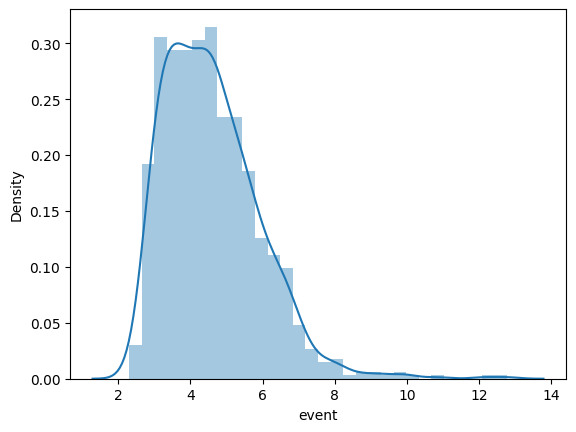

In [8]:
#Распределение долей объявлений по log просмотров
sns.distplot(x)

In [60]:
#Среднее кол-во просмотров на 1 объявление по дням
view_df = df_data.query("event=='view'")[["date", "ad_id"]]
ad_mean_df = view_df.groupby("date").agg([("ad_mean", lambda x: x.count()/len(x.unique()))])

In [47]:
ad_mean_df.reset_index()

,date,ad_id
,,ad_mean
0,2019-04-01,154.482270
1,2019-04-02,137.786982
2,2019-04-03,163.952778
3,2019-04-04,675.901720
4,2019-04-05,919.109677
5,2019-04-06,277.122727


In [40]:
#Расчёт скользящего среднего с окном 2
rolling_mean = ad_mean_df.rolling(2).mean()

In [46]:
rolling_mean.reset_index()

,date,ad_id
,,ad_mean
0,2019-04-01,NaN
1,2019-04-02,146.134626
2,2019-04-03,150.869880
3,2019-04-04,419.927249
4,2019-04-05,797.505699
5,2019-04-06,598.116202


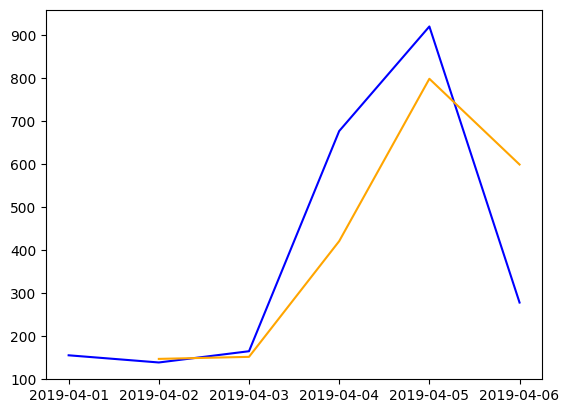

In [66]:
ax = plt.plot(ad_mean_df, "blue", rolling_mean, "orange")

In [49]:
ad_mean_df = ad_mean_df.reset_index().merge(rolling_mean.reset_index(), on="date")

C:\Users\pc\AppData\Local\Temp\ipykernel_6960\37541292.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  ad_mean_df = ad_mean_df.reset_index().merge(rolling_mean.reset_index(), on="date")


In [50]:
ad_mean_df

,date,ad_id_x,ad_id_y
,,ad_mean,ad_mean
0,2019-04-01,154.482270,NaN
1,2019-04-02,137.786982,146.134626
2,2019-04-03,163.952778,150.869880
3,2019-04-04,675.901720,419.927249
4,2019-04-05,919.109677,797.505699
5,2019-04-06,277.122727,598.116202


In [56]:
#Модуль разницы между обычным и скользящим средним
ad_mean_df["diff"] = abs(ad_mean_df["ad_id_x"]["ad_mean"] - ad_mean_df["ad_id_y"]["ad_mean"])

In [57]:
ad_mean_df

,date,ad_id_x,ad_id_y,diff
,,ad_mean,ad_mean,
0,2019-04-01,154.482270,NaN,NaN
1,2019-04-02,137.786982,146.134626,8.347644
2,2019-04-03,163.952778,150.869880,13.082898
3,2019-04-04,675.901720,419.927249,255.974471
4,2019-04-05,919.109677,797.505699,121.603979
5,2019-04-06,277.122727,598.116202,320.993475


In [82]:
#Соединяем две таблицы по client_union_id
merge_df = df_data.merge(df_clients_data, on="client_union_id")
#Приводим date_x и create_date из формата object к datetime
merge_df.date_x = merge_df.date_x.astype("datetime64[ns]")
merge_df.create_date = merge_df.create_date.astype("datetime64[ns]")

In [83]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 14 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   date_x                 1000000 non-null  datetime64[ns]
 1   time                   1000000 non-null  object        
 2   event                  1000000 non-null  object        
 3   platform               1000000 non-null  object        
 4   ad_id                  1000000 non-null  int64         
 5   client_union_id        1000000 non-null  int64         
 6   campaign_union_id      1000000 non-null  int64         
 7   ad_cost_type           1000000 non-null  object        
 8   ad_cost                1000000 non-null  float64       
 9   has_video              1000000 non-null  int64         
 10  target_audience_count  1000000 non-null  int64         
 11  date_y                 1000000 non-null  object        
 12  community_id           100000

In [84]:
merge_df["date_diff"] = merge_df.date_x - merge_df.create_date

In [86]:
#Среднее кол-во дней от создания рекламного клиента до первого запуска
merge_df.date_diff.mean()

Timedelta('105 days 02:40:39.302399998')

In [39]:
#Группируем клиентов по первой дате взаимодействия с их объявлением
min_date_groups = df_data.groupby("client_union_id").agg("min")[["date", "time"]]

In [40]:
#join-им с данным о клиентах, чтобы узнать в одной таблице видеть дату создания рекламного клиента и дату запуска рекламы
join_df = df_clients_data.join(min_date_groups, on="client_union_id", lsuffix="_l", rsuffix="_r")

In [41]:
#Приводим date_r и create_date из формата object к datetime
join_df.date_r = join_df.date_r.astype("datetime64[ns]")
join_df.create_date = join_df.create_date.astype("datetime64[ns]")

In [42]:
#Процент клиентов, котоыре запустили рекламу в течение года после создания клиента
round(join_df[(join_df.date_r-join_df.create_date)<pd.Timedelta(365, unit="day")].shape[0]/len(join_df.client_union_id.unique())*100,2)

0.69